In [2]:
import pandas as pd
police_killings = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/police-killings/police_killings.csv", encoding = "ISO-8859-1")
print(police_killings.columns)

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')


In [3]:
police_killings.head(5)

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


## Shootings By Race:

In [4]:
police_killings["raceethnicity"].value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64

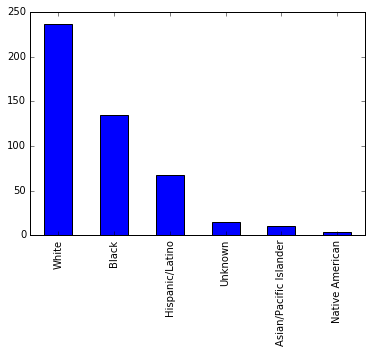

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

police_killings["raceethnicity"].value_counts().plot(kind = "bar")

In terms of total numbers, it appears that the police killed significantly more whites than black or other races. However, it would make more sense to weight this as a percentage of the population of the different races to see if there are any races are targeted disproportionately.

## Shootings by Regional Income:

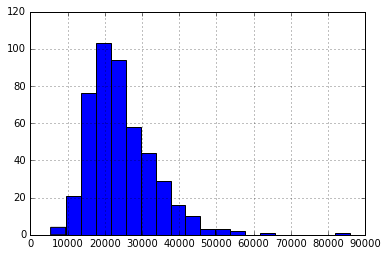

In [9]:
# removing the '-' symbol from the personal income column, and converting to float

income = police_killings["p_income"][police_killings["p_income"] != "-"].astype(float)

# plotting the median income:

income.hist(bins=20)

Shooting victims largely belong to the lower to mid median personal income groups of US society. It will be interesting to compare this to US median income as a whole. 



## Shootings by State

In [11]:
# Imported 2015 state population data from US census bureau 

state_pop = pd.read_csv("https://www.census.gov/popest/data/state/asrh/2015/files/SCPRC-EST2015-18+POP-RES.csv")

# made a new data Series called counts from the 'police killings' df to have just state code (1-50), and numbre of killings

counts = police_killings["state_fp"].value_counts()
counts.head()



6     74
48    47
12    29
4     25
40    22
Name: state_fp, dtype: int64

In [13]:
# Made a new dataframe comprised of state and killings from the count Series above

states = pd.DataFrame({"STATE":counts.index,"shootings":counts})

In [14]:
states = states.merge(state_pop, on = "STATE")
states.head()


,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS
0,6,74,40,4,9,California,39144818,30023902,76.7
1,48,47,40,3,7,Texas,27469114,20257343,73.7
2,12,29,40,3,5,Florida,20271272,16166143,79.7
3,4,25,40,4,8,Arizona,6828065,5205215,76.2
4,40,22,40,3,7,Oklahoma,3911338,2950017,75.4


In [15]:
# State population in millions

states["pop_millions"] = states["POPESTIMATE2015"] / 1000000

# shootings per 1 million people in each state

states["rate"] = states["shootings"] / states["pop_millions"]

print(states)

    STATE  shootings  SUMLEV REGION DIVISION                  NAME  \
0       6         74      40      4        9            California   
1      48         47      40      3        7                 Texas   
2      12         29      40      3        5               Florida   
3       4         25      40      4        8               Arizona   
4      40         22      40      3        7              Oklahoma   
5      13         16      40      3        5               Georgia   
6      36         13      40      1        2              New York   
7       8         12      40      4        8              Colorado   
8      34         11      40      1        2            New Jersey   
9      53         11      40      4        9            Washington   
10     22         11      40      3        7             Louisiana   
11     17         11      40      2        3              Illinois   
12     39         10      40      2        3                  Ohio   
13     29         10

In [19]:
states = states.sort_values(by = "rate", ascending=False)
print(states) 

    STATE  shootings  SUMLEV REGION DIVISION                  NAME  \
4      40         22      40      3        7              Oklahoma   
3       4         25      40      4        8               Arizona   
27     31          6      40      2        4              Nebraska   
34     15          4      40      4        9                Hawaii   
39      2          2      40      4        9                Alaska   
33     16          4      40      4        8                 Idaho   
32     35          5      40      4        8            New Mexico   
10     22         11      40      3        7             Louisiana   
7       8         12      40      4        8              Colorado   
41     10          2      40      3        5              Delaware   
24     20          6      40      2        4                Kansas   
26     28          6      40      3        6           Mississippi   
19     41          8      40      4        9                Oregon   
37     30          2

States with the most police killings in 2015 (per 1 million people) : OK, AZ, NE, HI, AK, ID. (High native American populations in these states?)
Sates with least amount of killings: CN, PY, IO, NY, MA, NH, MN (new england and northern states on the East Coast).


In [20]:
police_killings.head(2)

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402


In [21]:
pk = police_killings[
    (police_killings["share_white"] != "-") & 
    (police_killings["share_black"] != "-") & 
    (police_killings["share_hispanic"] != "-")
]

In [22]:
pk["share_white"] = pk["share_white"].astype(float)
pk["share_black"] = pk["share_black"].astype(float)
pk["share_hispanic"]= pk["share_hispanic"].astype(float)

C:\Users\rpatankar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\rpatankar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\rpatankar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [23]:
lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]

ls = pk[pk["state"].isin(lowest_states)]
hs = pk[pk["state"].isin(highest_states)]

In [25]:
ls.describe()


C:\Users\rpatankar\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,day,year,latitude,longitude,state_fp,county_fp,tract_ce,geo_id,county_id,pop,share_white,share_black,share_hispanic,h_income,county_income,comp_income,county_bucket,nat_bucket,urate,college
count,56.000000,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,54.000000,56.000000,56.000000,56.000000
mean,14.910714,2015.0,41.228598,-80.652688,33.053571,76.357143,254092.250000,3.313018e+10,33129.928571,4201.660714,60.616071,21.257143,12.948214,45497.392857,54830.839286,0.831186,2.351852,2.428571,0.126312,0.204219
std,8.657686,0.0,1.953354,7.270112,11.952055,77.343256,348169.822473,1.195056e+10,11950.692754,1428.970300,32.556947,27.770657,15.296417,21594.626616,12451.547261,0.313585,1.442710,1.291330,0.072598,0.147997
min,1.000000,2015.0,32.407139,-96.073891,9.000000,1.000000,101.000000,9.009184e+09,9009.000000,1271.000000,0.000000,0.000000,0.000000,18833.000000,34388.000000,0.329534,1.000000,1.000000,0.030341,0.026404
25%,7.000000,2015.0,40.544859,-87.882805,22.000000,26.500000,7097.500000,2.204122e+10,22040.500000,3299.250000,39.650000,2.100000,1.850000,31661.500000,46085.000000,0.613392,NaN,1.000000,0.080075,0.100815
50%,15.000000,2015.0,41.474882,-80.710449,36.000000,52.000000,40550.500000,3.606402e+10,36064.000000,4121.500000,72.950000,9.150000,6.200000,42494.000000,52930.000000,0.784233,NaN,2.000000,0.108124,0.159831
75%,22.000000,2015.0,42.274976,-73.957162,39.000000,113.000000,424800.000000,3.915353e+10,39153.000000,4928.250000,87.800000,25.125000,20.075000,58025.000000,59112.000000,1.053979,NaN,4.000000,0.166431,0.252750
max,31.000000,2015.0,46.159878,-68.100007,55.000000,467.000000,970300.000000,5.507902e+10,55079.000000,8222.000000,97.200000,98.900000,71.900000,142500.000000,87763.000000,1.677438,5.000000,5.000000,0.448075,0.744900


In [26]:
hs.describe()

C:\Users\rpatankar\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,day,year,latitude,longitude,state_fp,county_fp,tract_ce,geo_id,county_id,pop,share_white,share_black,share_hispanic,h_income,county_income,comp_income,county_bucket,nat_bucket,urate,college
count,92.000000,92.0,92.000000,92.000000,92.000000,92.000000,92.000000,9.200000e+01,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,84.000000,92.000000,92.000000,92.000000
mean,15.630435,2015.0,35.692503,-105.901915,19.619565,46.086957,237207.445652,1.966589e+10,19665.652174,4315.750000,55.652174,11.532609,20.693478,43327.152174,48706.967391,0.899455,2.476190,2.260870,0.102894,0.222367
std,9.030738,0.0,5.941451,15.627488,14.757261,42.203237,361762.631538,1.478322e+10,14783.200649,2063.723609,24.406158,19.591303,20.415690,17537.586163,9839.206872,0.334014,1.366344,1.175478,0.060407,0.141249
min,1.000000,2015.0,19.915194,-159.642700,2.000000,1.000000,100.000000,2.020001e+09,2020.000000,403.000000,2.100000,0.000000,0.000000,15293.000000,25498.000000,0.330230,1.000000,1.000000,0.011335,0.035051
25%,7.000000,2015.0,33.349889,-111.806766,4.000000,13.000000,2450.000000,4.021002e+09,4021.000000,2886.000000,39.175000,0.675000,4.350000,32509.250000,42987.000000,0.646527,NaN,1.000000,0.061153,0.120008
50%,16.000000,2015.0,35.268585,-104.943293,16.000000,27.000000,21803.500000,1.601401e+10,16014.000000,4257.500000,58.200000,2.700000,10.850000,39825.500000,48801.000000,0.856491,NaN,2.000000,0.089227,0.190484
75%,24.000000,2015.0,38.602924,-95.993210,35.000000,72.500000,379650.000000,3.503322e+10,35032.500000,5377.000000,74.200000,11.550000,31.725000,53574.750000,53596.000000,1.079215,NaN,3.000000,0.127920,0.271616
max,30.000000,2015.0,61.218408,-75.456352,40.000000,143.000000,978400.000000,4.014301e+10,40143.000000,13561.000000,95.900000,93.100000,81.500000,111464.000000,77454.000000,2.308703,5.000000,5.000000,0.324444,0.824971


In [27]:
ls.mean(axis=0)

day               1.491071e+01
year              2.015000e+03
latitude          4.122860e+01
longitude        -8.065269e+01
state_fp          3.305357e+01
county_fp         7.635714e+01
tract_ce          2.540922e+05
geo_id            3.313018e+10
county_id         3.312993e+04
pop               4.201661e+03
share_white       6.061607e+01
share_black       2.125714e+01
share_hispanic    1.294821e+01
h_income          4.549739e+04
county_income     5.483084e+04
comp_income       8.311860e-01
county_bucket     2.351852e+00
nat_bucket        2.428571e+00
urate             1.263122e-01
college           2.042194e-01
dtype: float64

In [28]:
hs.mean(axis=0)

day               1.563043e+01
year              2.015000e+03
latitude          3.569250e+01
longitude        -1.059019e+02
state_fp          1.961957e+01
county_fp         4.608696e+01
tract_ce          2.372074e+05
geo_id            1.966589e+10
county_id         1.966565e+04
pop               4.315750e+03
share_white       5.565217e+01
share_black       1.153261e+01
share_hispanic    2.069348e+01
h_income          4.332715e+04
county_income     4.870697e+04
comp_income       8.994545e-01
county_bucket     2.476190e+00
nat_bucket        2.260870e+00
urate             1.028939e-01
college           2.223668e-01
dtype: float64